# Basic Modeling

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [24]:
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
housing_predictions = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
print(forest_rmse) # Over Fitting!!!

18832.523090376377


# Cross Validation

In [26]:
from sklearn.model_selection import cross_val_score

In [27]:
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, 
                           scoring = "neg_mean_squared_error", cv = 10)
forest_rmse_scores = np.sqrt(-scores)

In [28]:
print("점수 : {}".format(forest_rmse_scores))
print("평균 : {}".format(forest_rmse_scores.mean()))
print("표준편차 : {}".format(forest_rmse_scores.std()))

점수 : [49463.05351842 47412.15232689 50024.31953006 52290.9588137
 49637.66915626 53296.87554736 48744.02544445 48442.90109636
 52621.75162506 50113.21056355]
평균 : 50204.69176221254
표준편차 : 1835.8775276128463


# GridSearch

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
param_grid = [
    {'n_estimators' : [3, 10, 30], 'max_features' : [2, 4, 6, 8]},
    {'bootstrap' : [False], 'n_estimators' : [3, 10], 'max_features' : [2, 3, 4]}
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv = 5,
                          scoring = 'neg_mean_squared_error',
                          return_train_score = True)

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [31]:
# 최적의 조합
print(grid_search.best_params_)

{'max_features': 8, 'n_estimators': 30}


In [32]:
# 최적의 추정기
print(grid_search.best_estimator_)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)


In [33]:
# 평가 점수
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]) :
    print(np.sqrt(-mean_score), params)

63857.39734776911 {'max_features': 2, 'n_estimators': 3}
55445.45489603856 {'max_features': 2, 'n_estimators': 10}
53070.257894867646 {'max_features': 2, 'n_estimators': 30}
60652.37343815983 {'max_features': 4, 'n_estimators': 3}
52303.674704968806 {'max_features': 4, 'n_estimators': 10}
50671.86514202674 {'max_features': 4, 'n_estimators': 30}
59324.56016838717 {'max_features': 6, 'n_estimators': 3}
51473.78360480851 {'max_features': 6, 'n_estimators': 10}
50148.4386070797 {'max_features': 6, 'n_estimators': 30}
58381.58303452285 {'max_features': 8, 'n_estimators': 3}
51930.66741700073 {'max_features': 8, 'n_estimators': 10}
49771.550677062594 {'max_features': 8, 'n_estimators': 30}
62178.73898226698 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
55115.89438951746 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60527.20093260016 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52804.97175172901 {'bootstrap': False, 'max_features': 3, 'n_estimators': 

# Feature Importance

In [35]:
feature_importances = grid_search.best_estimator_.feature_importances_
print(feature_importances)

[6.50231065e-02 5.84781538e-02 4.44774661e-02 1.55051373e-02
 1.40301651e-02 1.48158097e-02 1.46863955e-02 3.86048356e-01
 4.45992583e-02 1.15592086e-01 6.00069086e-02 5.36917746e-03
 1.56197669e-01 1.37077407e-04 1.74916426e-03 3.28406854e-03]


In [38]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs

In [39]:
sorted(zip(feature_importances, attributes), reverse = True)

[(0.38604835603973886, 'median_income'),
 (0.15619766893223241, 'INLAND'),
 (0.11559208633392949, 'pop_per_hhold'),
 (0.06502310654669093, 'longitude'),
 (0.06000690858421308, 'bedrooms_per_room'),
 (0.05847815382516095, 'latitude'),
 (0.04459925832890346, 'rooms_per_hhold'),
 (0.04447746611594569, 'housing_median_age'),
 (0.015505137312640367, 'total_rooms'),
 (0.014815809715758731, 'population'),
 (0.014686395458333815, 'households'),
 (0.014030165136368893, 'total_bedrooms'),
 (0.00536917745874515, '<1H OCEAN'),
 (0.0032840685445187905, 'NEAR OCEAN'),
 (0.0017491642596696967, 'NEAR BAY'),
 (0.00013707740714976395, 'ISLAND')]

# Validation by Test Data

In [43]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis = 1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [44]:
print(final_rmse)

48230.07148697883


In [45]:
from scipy import stats

In [49]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
print(np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                               loc = squared_errors.mean(),
                               scale = stats.sem(squared_errors))))

[46221.55027076 50158.22845601]


# Multiclas Classification

SGD, RandomForest, Naive Bayes 같은 일부 알고리즘은 여러 개의 클래스를 직접 처리할 수 있는 반면, Logistic Regression이나 SVM 같은 다른 알고리즘은 이진 분류만 가능하다. 하지만 이진 분류기를 여러 개 사용해 다중 클래스를 분류하는 기법도 많다.

* OvR(One-versus-Rest) : 특정 숫자 하나만 구분하는 숫자별 이진 분류기 10개(0에서 부터 9까지)를 훈련
* OvO(One-versus-One) : 0과 1 구별, 0과 2 구별, 1과 2 구별 등과 같이 각 숫자의 조합마다 이진 분류기를 훈련(클래스가 N개라면 Nx(N-1)/2개의 분류기 필요)

SVM 같은 일부알고리즘은 훈련 세트의 크기에 민감해서 큰 훈련 세트에서 몇 개의 분류기를 훈련시키는 것보다 작은 훈련 세트에서 많은 분류기를 훈련시키는 쪽이 빠르므로 OvO를 선호, 하지만 대부분의 이진 분류 알고리즘에서는 OvR을 선호한다.

In [12]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

In [ ]:
ovr_clf = OneVsRestClassifier(SVC())
ovr_clf.fit(X_train, y_train)
ovr_clf.predict([some_digit])

In [ ]:
len(ovr_clf.estimators_)

# Error Analysis

In [7]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=42, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv = 3, scoring = "accuracy")

array([0.8983, 0.891 , 0.9018])

In [11]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv = 3)

In [12]:
from sklearn.metrics import confusion_matrix

conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5577,    0,   22,    5,    8,   43,   36,    6,  225,    1],
       [   0, 6400,   37,   24,    4,   44,    4,    7,  212,   10],
       [  27,   27, 5220,   92,   73,   27,   67,   36,  378,   11],
       [  22,   17,  117, 5227,    2,  203,   27,   40,  403,   73],
       [  12,   14,   41,    9, 5182,   12,   34,   27,  347,  164],
       [  27,   15,   30,  168,   53, 4444,   75,   14,  535,   60],
       [  30,   15,   42,    3,   44,   97, 5552,    3,  131,    1],
       [  21,   10,   51,   30,   49,   12,    3, 5684,  195,  210],
       [  17,   63,   48,   86,    3,  126,   25,   10, 5429,   44],
       [  25,   18,   30,   64,  118,   36,    1,  179,  371, 5107]])

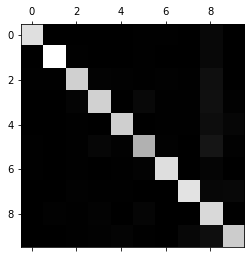

In [13]:
import matplotlib.pyplot as plt

plt.matshow(conf_mx, cmap = plt.cm.gray)
plt.show()

오차 행렬은 대부분의 이미지가 올바르게 분류되었음을 나타내는 주대각선에 있으므로 매우 좋아보임

In [14]:
row_sums = conf_mx.sum(axis = 1, keepdims = True)
norm_conf_mx = conf_mx / row_sums

오차 행렬의 가 값을 대응되는 클래스의 이미지 갯수로 나눠 에러 비율을 비교(정규화)

행은 실제 클래스, 열은 예측한 클래스

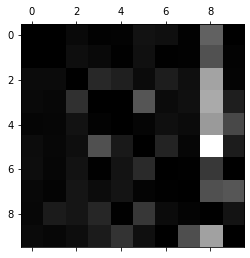

In [15]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap = plt.cm.gray)
plt.show()

많은 이미지가 8로 잘못 분류되었음

# Setting

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit

In [2]:
housing = pd.read_csv("/home/rymyung/github/handson-ml/datasets/housing/housing.csv")

# Regression Data Set

In [3]:
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1, 2, 3, 4, 5])

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing["income_cat"]) :
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

for set_ in (strat_train_set, strat_test_set) :
    set_.drop("income_cat", axis = 1, inplace = True)
    
housing = strat_train_set.drop("median_house_value", axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [4]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin) :
    def __init__(self, add_bedrooms_per_room = True) : # *args나 **kargs가 아님
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None) :
        return self
    
    def transform(self, X) :
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        if self.add_bedrooms_per_room :
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else :
            return np.c_[X, rooms_per_household, population_per_household]

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

In [6]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [8]:
housing_num = housing.drop("ocean_proximity", axis = 1) # 범주형 변수 제거
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [9]:
full_pipeline = ColumnTransformer([
    # ("이름", 변환기, 변환기가 적용될 칼럼 이름)
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
])

In [10]:
housing_prepared = full_pipeline.fit_transform(housing)

# Classification Data Set

In [3]:
from sklearn.datasets import fetch_openml
import numpy as np

In [4]:
mnist = fetch_openml('mnist_784', version = 1)
X, y = mnist["data"], mnist["target"]
y = y.astype(np.uint8)
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)
some_digit = X[0] # Sample Input